In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
filepath = 'data/train.csv'
df = pd.read_csv(filepath)


In [76]:
data = df.copy()

In [7]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Exploratory Data Analysis

In [41]:
# size of dataset
data.shape

(8693, 14)

In [42]:
# information about features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [40]:
# categorical variables
categorical_features = [col for col in data.select_dtypes(include=['object']).columns]
print (categorical_features)

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']


In [39]:
# numerical variables
numerical_features = [col for col in data.select_dtypes(include=['number']).columns]
print (numerical_features)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [34]:
# number of duplicated rows
data.duplicated().sum()

0

In [33]:
# percentage of missing data per column
data.isna().mean()*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

Most columns have ~2% of missing values. There are multiple strategies of dealing with missing data, the most simple being to drop those observations:

In [58]:
# percentage of data loss by dropping observations with missing data
data_loss = 1 - (data.dropna().shape[0]/data.shape[0])
print (f"By dropping rows with missing data we lose {round(data_loss,2)*100}% of the original dataset size")

By dropping rows with missing data we lose 24.0% of the original dataset size


Dropping observations with missing information leads to a considerable loss in the size of the dataset, so I'll try to see if I can fill in the missing data for some of these features

In [73]:
# describe data (numerical variables)
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [75]:
# describe data (categorical variables)
data.describe(include=[object])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


#### PassangerId
A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

In [78]:
data['PassengerId'].nunique()

8693

Since the PassengerId column contains information about the group each individual passenger is travelling with, I'll extract that information to have an idea of how many groups are in the dataset

In [112]:
data['Group']=data['PassengerId'].str.split('_').str[0]
print (f"There are {data['Group'].nunique()} groups of passengers in the dataset")

There are 6217 groups of passengers in the dataset


In [113]:
# distribuition of groups by number of passengers
pd.cut(data['Group'].value_counts(dropna=False),bins=5).value_counts()

count
(0.993, 2.4]    5646
(2.4, 3.8]       340
(3.8, 5.2]       156
(6.6, 8.0]        46
(5.2, 6.6]        29
Name: count, dtype: int64

In [115]:
#data['Group'].value_counts().hist(grid=False)

#### HomePlanet

In [116]:
data['HomePlanet'].value_counts(dropna=False)

HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64

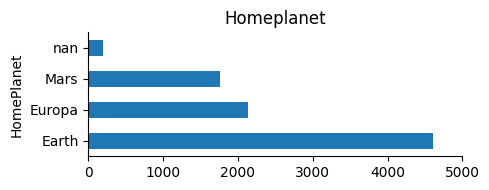

In [125]:
plt.figure(figsize=(5,2))
plt.title('Homeplanet')
data['HomePlanet'].value_counts(dropna=False).plot.barh()

plt.xlim(0,5000)

sns.despine()
plt.tight_layout()

Are there differences in the % of Transported passengers based on their Homeplanet?

In [156]:
data.groupby(by=['HomePlanet'],dropna=False).Transported.value_counts(dropna=False, normalize=True)*100

HomePlanet  Transported
Earth       False          57.605389
            True           42.394611
Europa      True           65.884561
            False          34.115439
Mars        True           52.302445
            False          47.697555
NaN         True           51.243781
            False          48.756219
Name: proportion, dtype: float64

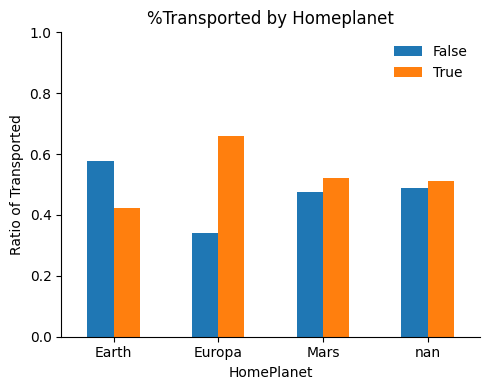

In [158]:
data.groupby(by=['HomePlanet'],dropna=False).Transported.value_counts(dropna=False, normalize=True).unstack().plot.bar(rot=0, figsize=(5,4))
plt.title('%Transported by Homeplanet')

plt.ylim(0,1)
plt.ylabel('Ratio of Transported')

plt.legend(frameon=False)
sns.despine()
plt.tight_layout()

Interestingly it seems that passengers from Europa are more likely to be Transported than not

#### CryoSleep

In [162]:
data.CryoSleep.value_counts(dropna=False)

CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64

In [60]:
data['Age'].isna().sum()

179

In [70]:
data['Transported'].value_counts(normalize=True)

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

In [68]:
data[data['Age']==0].Transported.value_counts()

Transported
True     144
False     34
Name: count, dtype: int64

In [59]:
data[numerical_features]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0
